# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
#Importing the dataset

df = pd.read_csv('/kaggle/input/titanictestdataset/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [6]:
df.shape

(418, 12)

In [7]:
# Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df['Age'].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [9]:
df['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [10]:
df['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [11]:
# Handling the null values 

columns = ['Age', 'Fare']
for col in columns:
    df[col].fillna(df[col].median(), inplace = True)
    
df['Cabin'].fillna('Unknown', inplace=True)

In [12]:
#checking duplicate values

dup_val = df.duplicated().sum()
dup_val


0

In [13]:
#Checking if there are any typos

for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '***************************************************************************', '\n')

Name of Column: Name
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexa

In [14]:
# Dropping the columns

df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,Unknown,Q
1,1,3,female,47.0,1,0,7.0000,Unknown,S
2,0,2,male,62.0,0,0,9.6875,Unknown,Q
3,0,3,male,27.0,0,0,8.6625,Unknown,S
4,1,3,female,22.0,1,1,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,Unknown,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,Unknown,S
416,0,3,male,27.0,0,0,8.0500,Unknown,S


In [15]:
df.shape

(418, 9)

**Converting Categorical Features to Numerical Value**

In [16]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,Unknown,Q
1,1,3,1,47.0,1,0,7.0000,Unknown,S
2,0,2,0,62.0,0,0,9.6875,Unknown,Q
3,0,3,0,27.0,0,0,8.6625,Unknown,S
4,1,3,1,22.0,1,1,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500,Unknown,S
414,1,1,1,39.0,0,0,108.9000,C105,C
415,0,3,0,38.5,0,0,7.2500,Unknown,S
416,0,3,0,27.0,0,0,8.0500,Unknown,S


In [18]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1, 'Q': 2})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,Unknown,2
1,1,3,1,47.0,1,0,7.0000,Unknown,0
2,0,2,0,62.0,0,0,9.6875,Unknown,2
3,0,3,0,27.0,0,0,8.6625,Unknown,0
4,1,3,1,22.0,1,1,12.2875,Unknown,0
...,...,...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500,Unknown,0
414,1,1,1,39.0,0,0,108.9000,C105,1
415,0,3,0,38.5,0,0,7.2500,Unknown,0
416,0,3,0,27.0,0,0,8.0500,Unknown,0


**Converting the cabin column using LabelEncoder**

In [19]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'])


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Cabin     418 non-null    int64  
 8   Embarked  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,76,2
1,1,3,1,47.0,1,0,7.0000,76,0
2,0,2,0,62.0,0,0,9.6875,76,2
3,0,3,0,27.0,0,0,8.6625,76,0
4,1,3,1,22.0,1,1,12.2875,76,0


# Data Visualization

**Survived analysis**

In [22]:
df['Survived']=df['Survived'].astype("string")
df['Survived'].replace('0','Died',inplace=True)
df['Survived'].replace('1','Survived',inplace=True)

In [23]:
df['Survived'].value_counts()

Survived
Died        266
Survived    152
Name: count, dtype: Int64

In [24]:
px.histogram(df,x='Survived',color='Survived',text_auto='3s',width=800,height=500)

**PClass analysis**

In [25]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [26]:
px.histogram(df,x='Pclass',color='Pclass',text_auto='3s',width=800,height=500)

**Sex Analysis**

In [27]:
df['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [28]:
px.histogram(df,x='Sex',color='Sex',text_auto='3s',width=800,height=500)

**Age Analysis**

In [29]:
df['Age'].value_counts()

Age
27.0    98
21.0    17
24.0    17
22.0    16
30.0    15
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [30]:
px.histogram(df,x='Age',color='Age',text_auto='3s',width=800,height=500)

**SibSp Analysis**

In [31]:
df['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [32]:
px.histogram(df,x='SibSp',color='SibSp',text_auto='3s',width=800,height=500)

**Parch Analysis**

In [33]:
df['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [34]:
px.histogram(df,x='Parch',color='Parch',text_auto='3s',width=800,height=500)

**Fare Analysis**

In [35]:
df['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [36]:
px.histogram(df,x='Fare',color='Fare',text_auto='3s',width=800,height=500)

**cabin Analysis**

In [37]:
df['Cabin'].value_counts()

Cabin
76    327
15      3
45      2
24      2
42      2
     ... 
63      1
66      1
16      1
39      1
22      1
Name: count, Length: 77, dtype: int64

In [38]:
px.histogram(df,x='Cabin',color='Cabin',text_auto='3s',width=800,height=500)

**Embarked Analysis**

In [39]:
df['Embarked'].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [40]:
px.histogram(df,x='Embarked',color='Embarked',text_auto='3s',width=800,height=500)

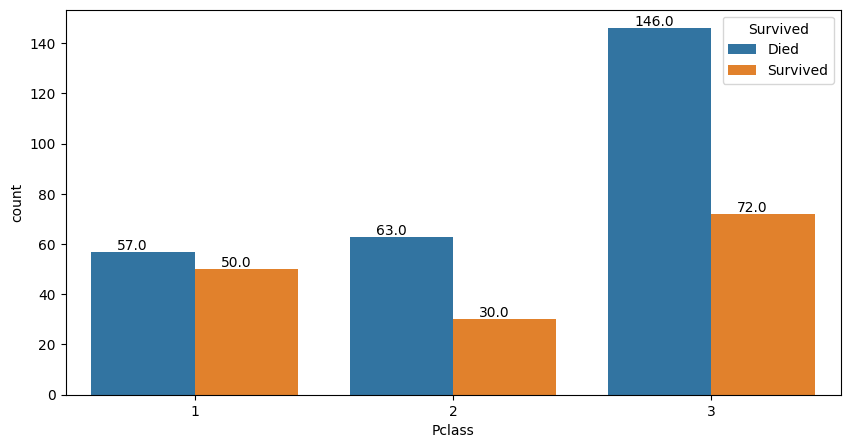

In [41]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x=df.Pclass, data=df, hue='Survived')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))


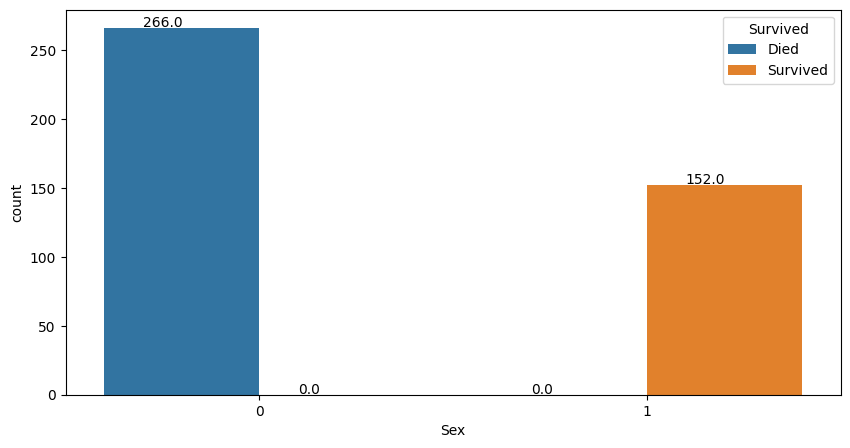

In [42]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x=df.Sex, data=df, hue='Survived')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))


In [43]:
# plt.figure(figsize=(10, 5))
# ax=sns.countplot(x=df.Age, data=df, hue='Survived')

# for p in ax.patches:
#    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))


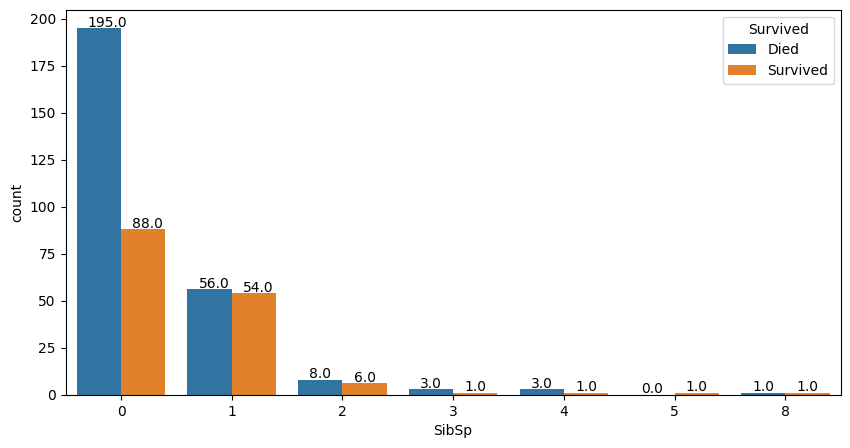

In [44]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x=df.SibSp, data=df, hue='Survived')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))


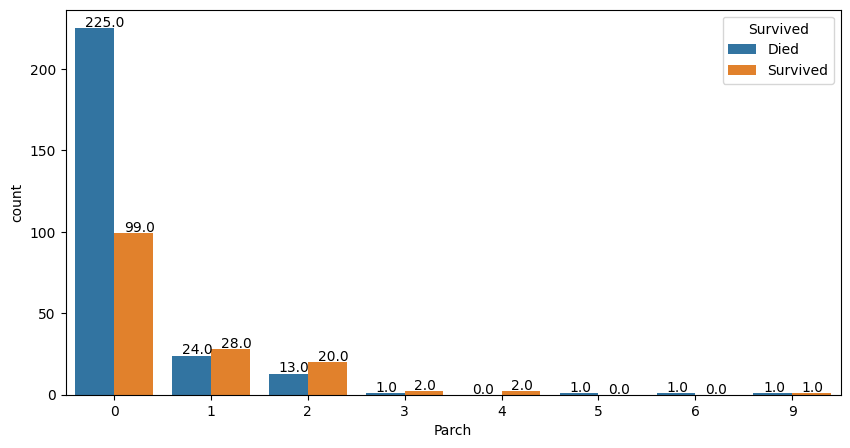

In [45]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x=df.Parch, data=df, hue='Survived')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))

In [46]:
# plt.figure(figsize=(10, 5))
# ax=sns.countplot(x=df.Fare, data=df, hue='Survived')

# for p in ax.patches:
#    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))

In [47]:
# plt.figure(figsize=(10, 5))
# ax=sns.countplot(x=df.Cabin, data=df, hue='Survived')

# for p in ax.patches:
#    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))

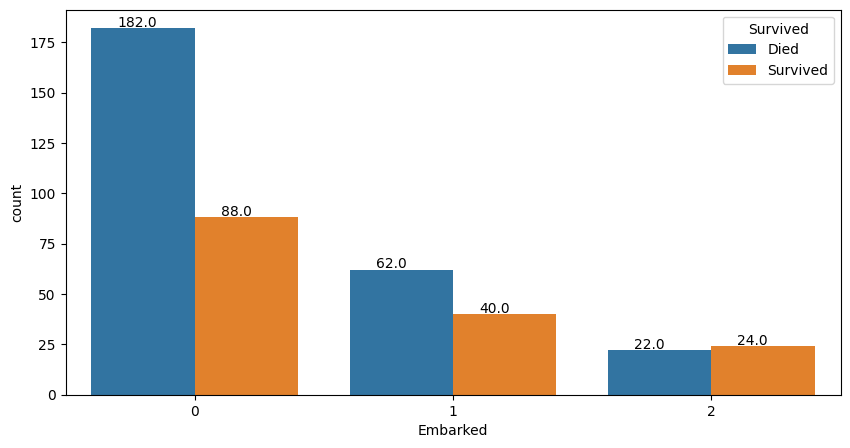

In [48]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x=df.Embarked, data=df, hue='Survived')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9))

# Model Evaluated

**Split Data**

In [49]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [51]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
336,2,0,32.0,0,0,13.0000,76,0
31,2,0,24.0,2,0,31.5000,76,0
84,2,0,27.0,0,0,10.7083,76,2
287,1,0,24.0,1,0,82.2667,12,0
317,2,0,19.0,0,0,10.5000,76,0
...,...,...,...,...,...,...,...,...
71,3,0,21.0,0,0,7.8958,76,0
106,3,0,21.0,0,0,7.8208,76,2
270,1,0,46.0,0,0,75.2417,38,1
348,2,0,24.0,0,0,13.5000,76,0


In [52]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
321,3,0,25.0,0,0,7.2292,70,1
324,1,1,39.0,0,0,211.3375,76,0
388,3,0,21.0,0,0,7.7500,76,2
56,3,0,35.0,0,0,7.8958,76,0
153,3,1,36.0,0,2,12.1833,76,0
...,...,...,...,...,...,...,...,...
57,3,0,25.0,0,0,7.6500,71,0
126,3,0,22.0,0,0,7.7958,76,0
24,1,1,48.0,1,3,262.3750,15,1
17,3,0,21.0,0,0,7.2250,76,1


In [53]:
y_train

336    Died
31     Died
84     Died
287    Died
317    Died
       ... 
71     Died
106    Died
270    Died
348    Died
102    Died
Name: Survived, Length: 334, dtype: string

In [54]:
y_test

321        Died
324    Survived
388        Died
56         Died
153    Survived
         ...   
57         Died
126        Died
24     Survived
17         Died
66     Survived
Name: Survived, Length: 84, dtype: string

# Trained Model

**Logistic Regression**

In [55]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LR_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',LR_model )
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 100.0
Confusion matrix :
 [[50  0]
 [ 0 34]]


In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

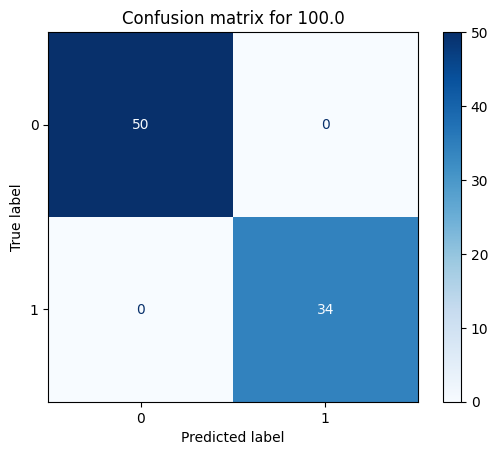

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {LR_model}')
plt.show()

**Gaussian Naive Bayes**

In [58]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
GNB_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',GNB_model )
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 100.0
Confusion matrix :
 [[50  0]
 [ 0 34]]


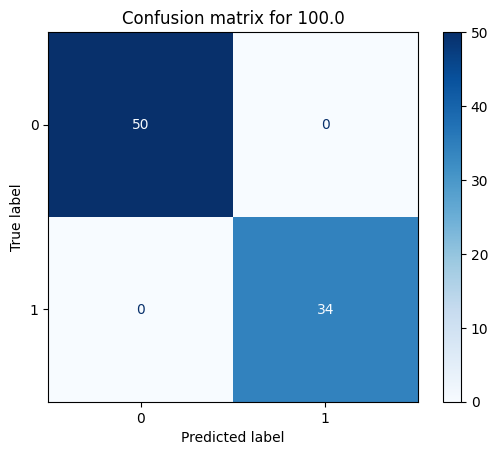

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {GNB_model}')
plt.show()

**Support Vector Machines**

In [60]:

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
SVC_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',SVC_model )
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 60.71
Confusion matrix :
 [[48  2]
 [31  3]]


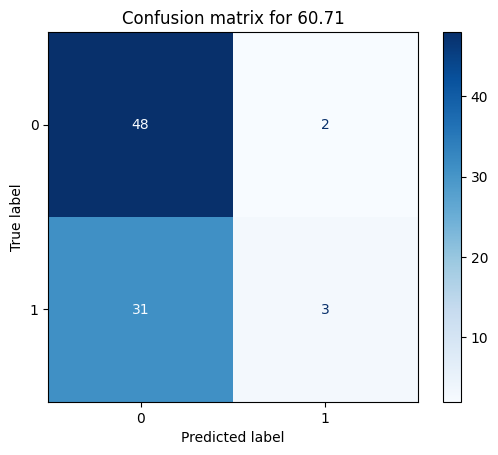

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {SVC_model}')
plt.show()

**Decision Tree**

In [62]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
DT_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',DT_model )
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 100.0
Confusion matrix :
 [[50  0]
 [ 0 34]]


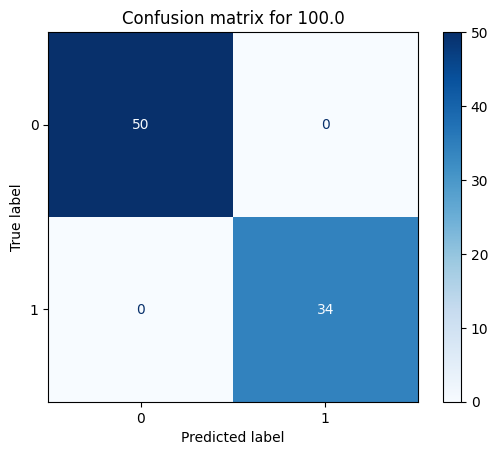

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {DT_model}')
plt.show()

**Random Forest**

In [64]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RF_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',RF_model )
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 100.0
Confusion matrix :
 [[50  0]
 [ 0 34]]


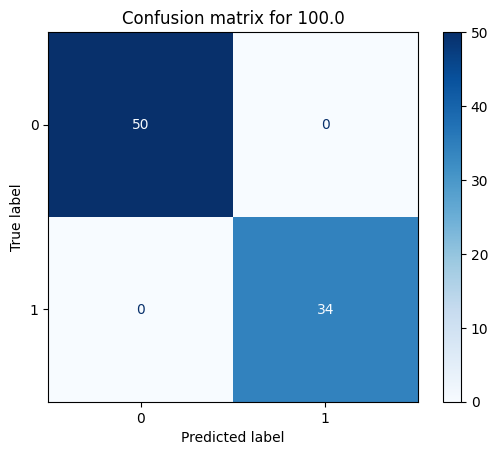

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {RF_model}')
plt.show()

**k-Nearest Neighbors**

In [66]:
 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
KNN_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',KNN_model)
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 55.95
Confusion matrix :
 [[38 12]
 [25  9]]


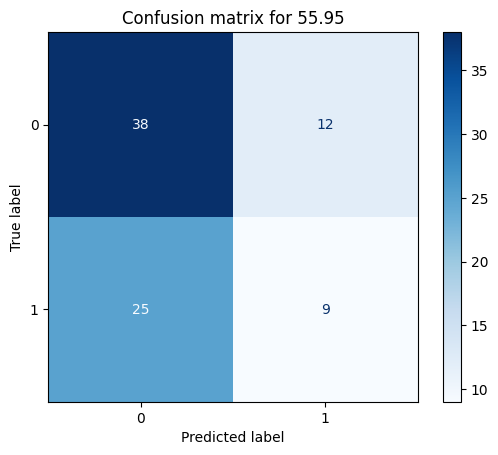

In [67]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {KNN_model}')
plt.show()

 **Gradient Boosting Classifier**

In [68]:

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
GBC_model = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy :',GBC_model)
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Accuracy : 100.0
Confusion matrix :
 [[50  0]
 [ 0 34]]


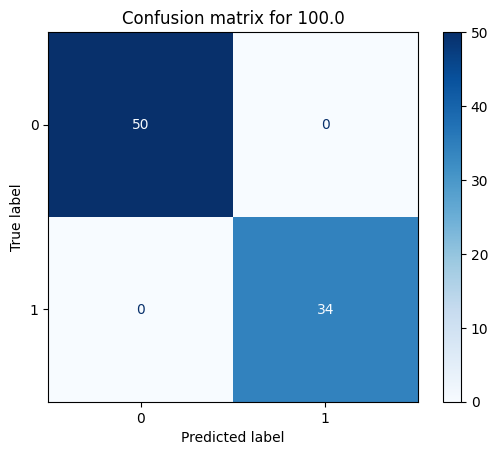

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot(cmap='Blues', values_format='d', xticks_rotation='horizontal')
plt.title(f'Confusion matrix for {GBC_model}')
plt.show()